In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
nike_stock = pd.read_csv("/home/user/Desktop/Data_analysis_projects/Shoe_Brands/nike.csv")
adidas_stock = pd.read_csv("/home/user/Desktop/Data_analysis_projects/Shoe_Brands/adidas.csv")

In [3]:
nike_stock.loc[:, "date"] = pd.to_datetime(nike_stock.loc[:, "date"])
adidas_stock.loc[:, "date"] = pd.to_datetime(adidas_stock.loc[:, "date"])

In [4]:
nike_stock.describe()

,1. open,2. high,3. low,4. close,5. volume
count,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03
mean,85.213382,86.089260,84.348470,85.235730,5.982110e+06
std,26.593931,26.783236,26.356173,26.561941,5.506224e+06
min,38.970000,40.080000,38.240000,38.570000,5.427130e+05
25%,63.610000,64.240000,62.850000,63.600000,2.851500e+06
50%,81.150000,81.910000,80.430000,81.200000,4.688400e+06
75%,99.550000,100.305000,98.850000,99.680000,7.503676e+06
max,176.350000,179.100000,175.495000,177.510000,1.299670e+08


In [5]:
nike_stock.corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.999535,0.999479,0.998995,-0.061647
2. high,0.999535,1.000000,0.999288,0.999504,-0.055346
3. low,0.999479,0.999288,1.000000,0.999497,-0.068230
4. close,0.998995,0.999504,0.999497,1.000000,-0.062401
5. volume,-0.061647,-0.055346,-0.068230,-0.062401,1.000000


In [6]:
needs = ["1. open", "2. high", "3. low", "4. close"]
nike_arr = np.zeros((len(nike_stock)+1, 4))
nike_arr[0] = np.arange(1,5)
for i, col in enumerate(needs):
    details_nike = np.round(nike_stock.loc[:, col], decimals = 2)
    nike_arr[1:, i] = details_nike
nike_arr

array([[ 1.  ,  2.  ,  3.  ,  4.  ],
       [86.79, 87.4 , 85.34, 85.95],
       [85.65, 86.4 , 85.35, 85.55],
       ...,
       [73.44, 73.6 , 71.63, 72.1 ],
       [72.01, 72.25, 70.74, 70.89],
       [70.78, 72.49, 70.42, 71.28]])

In [7]:
adidas_stock.describe()

,1. open,2. high,3. low,4. close,5. volume
count,4919.000000,4919.000000,4919.000000,4919.000000,4.919000e+03
mean,76.169242,76.715857,75.611098,76.193965,5.953900e+04
std,46.745422,47.021752,46.408842,46.740762,1.008696e+05
min,13.650000,14.000000,12.950000,13.000000,0.000000e+00
25%,33.930000,34.250000,33.600000,33.960000,1.871450e+04
50%,60.120000,60.390000,59.791000,60.260000,3.113500e+04
75%,113.762500,114.475000,112.895000,113.670000,5.841300e+04
max,196.680000,199.440000,196.280000,198.680000,2.511831e+06


In [8]:
adidas_stock.corr()

,1. open,2. high,3. low,4. close,5. volume
1. open,1.000000,0.999870,0.999882,0.999817,0.042495
2. high,0.999870,1.000000,0.999808,0.999867,0.043970
3. low,0.999882,0.999808,1.000000,0.999911,0.039910
4. close,0.999817,0.999867,0.999911,1.000000,0.041309
5. volume,0.042495,0.043970,0.039910,0.041309,1.000000


In [9]:
needs = ["1. open", "2. high", "3. low", "4. close"]
adidas_arr = np.zeros((len(adidas_stock)+1, 4))
adidas_arr[0] = np.arange(1,5)
for i, col in enumerate(needs):
    details_adidas = np.round(adidas_stock.loc[:, col], decimals = 2)
    adidas_arr[1:, i] = details_adidas
adidas_arr

array([[  1.  ,   2.  ,   3.  ,   4.  ],
       [ 99.25,  99.25,  98.75,  99.25],
       [100.75, 100.75, 100.75, 100.75],
       ...,
       [106.22, 107.13, 105.68, 107.  ],
       [106.53, 106.62, 105.  , 105.55],
       [105.25, 106.12, 104.75, 105.7 ]])

In [10]:
com = nike_arr[1:4920, :] - adidas_arr[1:]


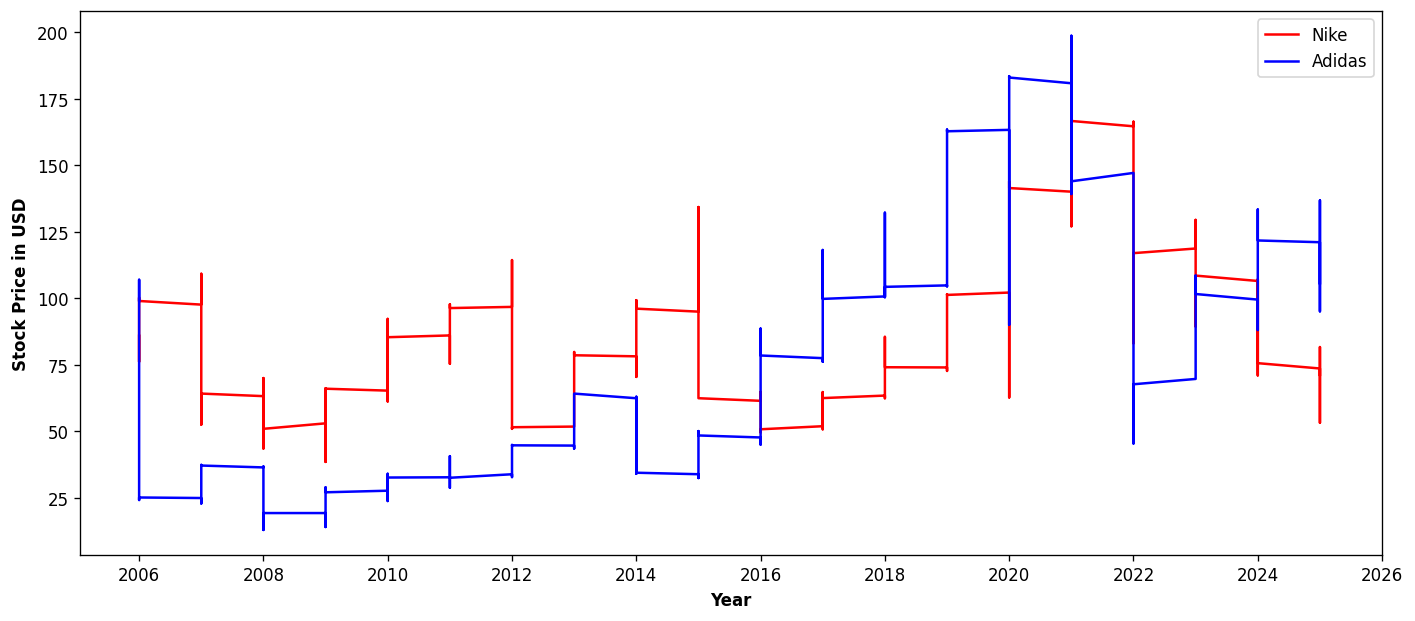

In [11]:
plt.figure(dpi = 120, figsize = (14, 6)) 
plt.plot(nike_stock["date"].dt.year, nike_stock["4. close"], c = "r", label = "Nike")
plt.plot(adidas_stock["date"].dt.year, adidas_stock["4. close"], c = "b", label = "Adidas")
plt.xticks(np.arange(2006, 2027, 2))
plt.xlabel("Year", fontweight = "bold")
plt.ylabel("Stock Price in USD", fontweight = "bold")
plt.legend()
plt.show()

In [12]:
nike_stock[nike_stock["4. close"] == nike_stock["4. close"].min()]

,date,1. open,2. high,3. low,4. close,5. volume
799,2009-03-09,39.35,40.08,38.24,38.57,5173800.0


In [13]:
adidas_stock[adidas_stock["4. close"] == adidas_stock["4. close"].min()]

,date,1. open,2. high,3. low,4. close,5. volume
685,2008-11-20,13.65,14.05,12.95,13.0,56412.0


In [14]:
# intialising array
nike_month_arr = np.zeros((444, 12))
nike_month_arr[0] = np.arange(1, 13)
# getting values
months_nike = nike_stock["date"].dt.month.values
prices_nike = nike_stock["4. close"].values
# filling
for month in months_nike:
    month_prices_nike = prices_nike[months_nike == month]
    nike_month_arr[1 : len(month_prices_nike) + 1, month - 1] = month_prices_nike
nike_month_arr

array([[ 1.  ,  2.  ,  3.  , ..., 10.  , 11.  , 12.  ],
       [85.95, 83.13, 86.31, ..., 87.48, 91.39, 97.6 ],
       [85.55, 83.35, 86.05, ..., 87.86, 92.8 , 98.14],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [15]:
# intialising 
adidas_month_arr = np.zeros((444, 12))
adidas_month_arr[0] = np.arange(1, 13)
months_adidas = adidas_stock["date"].dt.month.values
prices_adidas = adidas_stock["4. close"].values

for month in months_adidas:
    month_prices_adidas = prices_adidas[months_adidas == month]
    adidas_month_arr[1 : len(month_prices_adidas) + 1, month - 1] = month_prices_adidas
adidas_month_arr

array([[  1.  ,   2.  ,   3.  , ...,  10.  ,  11.  ,  12.  ],
       [ 99.25, 105.  ,  99.  , ...,  24.7 ,  24.7 ,  24.55],
       [100.75, 105.  ,  94.25, ...,  24.7 ,  24.7 ,  24.55],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [16]:
for i in range(0,12):
    print(i+1, np.mean(nike_month_arr[1:, i]))

1 77.9635914221219
2 74.70117381489841
3 84.23916478555306
4 76.60638826185102
5 78.12038374717834
6 78.3413769751693
7 79.08349887133183
8 84.1725282167043
9 77.19835214446951
10 82.39497629796838
11 79.0339051918736
12 82.66939051918736


In [17]:
for i in range(0, 12):
    print(i+1, np.mean(adidas_month_arr[1:, i]))

1 70.46818713318285
2 66.28977742663656
3 69.94216794582391
4 68.15143679458238
5 73.65547629796839
6 75.84083589164787
7 73.71218013544018
8 77.01342460496613
9 68.9834618510158
10 70.01845688487585
11 64.90214582392777
12 67.06785146726862


In [18]:
def create_yearly_array(stock_data):
    """ 
    for creating a yearly numpy with stock prices at the end of a particular period
    parameter = A pandas data containing necessary stock data
    return - A numpy array of size 5080
    """
    # getting values
    years = stock_data["date"].dt.year.values
    y_prices = stock_data["4. close"].values
    # intialising the array
    year_arr = np.zeros((254, 20))
    year_arr[0] = np.arange(2006, 2026)
    # looping 
    for col, year in enumerate(np.unique(years)):
        year_prices = y_prices[years == year]
        year_arr[1: len(year_prices) + 1, col] = year_prices
    
    return year_arr

In [19]:
# intialising 

nike_year_arr = create_yearly_array(nike_stock)
adidas_year_arr = create_yearly_array(adidas_stock)

adidas_year_arr

array([[2006.  , 2007.  , 2008.  , ..., 2023.  , 2024.  , 2025.  ],
       [  99.25,   25.  ,   36.5 , ...,   69.74,   99.55,  121.11],
       [ 100.75,   25.  ,   36.75, ...,   73.49,   97.71,  120.34],
       ...,
       [   0.  ,   37.2 ,   18.3 , ...,    0.  ,  122.39,    0.  ],
       [   0.  ,    0.  ,   19.05, ...,    0.  ,  121.77,    0.  ],
       [   0.  ,    0.  ,   19.35, ...,    0.  ,    0.  ,    0.  ]])

In [20]:
for i, year in enumerate(nike_year_arr[0]):
    print(year, np.mean(nike_year_arr[1:, i]))

2006.0 84.63122924901187
2007.0 68.80628458498025
2008.0 60.060671936758894
2009.0 54.57727272727272
2010.0 74.26537549407115
2011.0 86.38632411067194
2012.0 98.90671936758893
2013.0 64.53549407114625
2014.0 80.51055335968378
2015.0 108.56446640316204
2016.0 56.02494071146245
2017.0 55.26559090909092
2018.0 72.36221343873518
2019.0 86.39055335968378
2020.0 106.45557312252966
2021.0 149.9975098814229
2022.0 115.72525691699605
2023.0 111.15750988142292
2024.0 87.37790513833993
2025.0 49.3600395256917


In [21]:
for i, year in enumerate(adidas_year_arr[0]):
    print(year, np.mean(adidas_year_arr[1:, i]))

2006.0 45.72466403162056
2007.0 29.389999999999997
2008.0 28.212806324110673
2009.0 21.06837944664032
2010.0 28.069071146245054
2011.0 34.03521739130435
2012.0 38.80611739130435
2013.0 53.46532015810276
2014.0 47.00516600790514
2015.0 40.386367588932806
2016.0 68.89746837944665
2017.0 99.22782608695653
2018.0 113.8854743083004
2019.0 140.3001581027668
2020.0 146.19677154150196
2021.0 168.42021225296443
2022.0 90.58507470355731
2023.0 88.79456679841897
2024.0 115.39044782608697
2025.0 83.55435770750988
